In [5]:
import pandas as pd

In [7]:
donors = pd.read_csv("../data/donors.csv")
donations = pd.read_csv("../data/donations.csv")

In [9]:
print("Donors:")
display(donors.head())

Donors:


,donor_id,name,email,join_date
0,1,Maureen West,lsmith@example.net,2023-04-13
1,2,Laurie Nelson,toddhaynes@example.org,2022-06-22
2,3,Taylor Walker,bmartin@example.net,2020-07-30
3,4,Jay Barnes,michellebennett@example.net,2020-12-23
4,5,Kayla Sanchez,deanmurphy@example.net,2020-08-02


In [11]:
print("Donations:")
display(donations.head())

Donations:


,donor_id,donation_date,amount
0,240,2022-09-03,37.40
1,90,2023-07-02,495.15
2,277,2023-05-17,830.15
3,13,2025-03-24,962.48
4,137,2025-02-13,521.72


In [13]:
donors.info()
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   donor_id   300 non-null    int64 
 1   name       300 non-null    object
 2   email      300 non-null    object
 3   join_date  300 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   donor_id       1200 non-null   int64  
 1   donation_date  1200 non-null   object 
 2   amount         1200 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.3+ KB


In [15]:
donations.describe()

,donor_id,amount
count,1200.000000,1200.000000
mean,153.646667,517.263417
std,85.816600,285.940605
min,1.000000,10.200000
25%,80.000000,263.692500
50%,156.000000,533.185000
75%,226.000000,776.467500
max,300.000000,999.580000


In [17]:
donors.isnull().sum()
donations.isnull().sum()

donor_id         0
donation_date    0
amount           0
dtype: int64

In [19]:
donors['donor_id'].nunique()
donations['donor_id'].nunique()

297

In [21]:
donations['donor_id'].value_counts().head()

donor_id
197    11
200    11
138    10
98      9
247     9
Name: count, dtype: int64

In [23]:
donors['join_date'] = pd.to_datetime(donors['join_date'])
donations['donation_date'] = pd.to_datetime(donations['donation_date'])

In [25]:
merge = pd.merge(donations, donors, on='donor_id', how='left')
merge.head()

,donor_id,donation_date,amount,name,email,join_date
0,240,2022-09-03,37.40,Kathleen Green,tyronemiller@example.org,2022-04-30
1,90,2023-07-02,495.15,Jeffrey Palmer,hallhunter@example.net,2023-03-18
2,277,2023-05-17,830.15,Jennifer Parker,pattersonjoshua@example.com,2022-06-09
3,13,2025-03-24,962.48,Alexander Blevins,wrightsheila@example.org,2021-11-16
4,137,2025-02-13,521.72,Margaret Harper,ekidd@example.org,2024-07-20


In [27]:
merged_data = pd.merge(donors, donations, on='donor_id', how='inner')

In [29]:
total_donations = merged_data.groupby('donor_id')['amount'].sum().reset_index()

In [31]:
total_donations = total_donations.sort_values(by='amount', ascending=False)

In [33]:
total_donations = total_donations.merge(donors[['donor_id', 'name', 'email']], on='donor_id')

In [35]:
total_donations.head()

,donor_id,amount,name,email
0,200,6831.49,Joseph Carpenter,halenatasha@example.net
1,197,6002.33,William Davila,lewisguy@example.org
2,138,5746.07,Arthur Espinoza,scott42@example.net
3,136,5399.22,Michael Scott,meyerjoseph@example.org
4,247,5192.93,Nicole Richard,timothy25@example.org


In [37]:
import matplotlib.pyplot as plt

In [38]:
top_donors = total_donations.sort_values(by='amount', ascending=False).head(10)

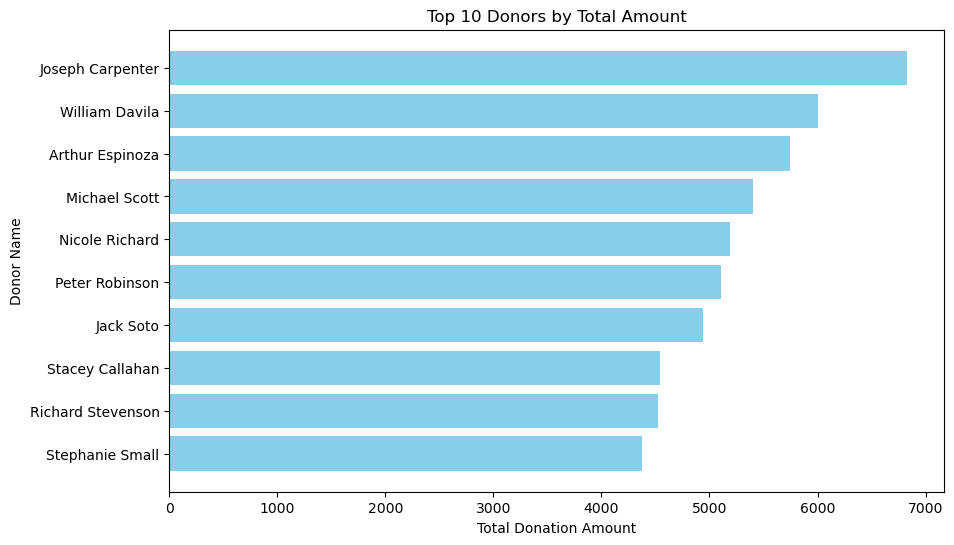

In [41]:
plt.figure(figsize=(10, 6))
plt.barh(top_donors['name'], top_donors['amount'], color='skyblue')
plt.xlabel('Total Donation Amount')
plt.ylabel('Donor Name')
plt.title('Top 10 Donors by Total Amount')
plt.gca().invert_yaxis()
plt.savefig('top_10_donor.png', bbox_inches='tight')
plt.show()

In [43]:
donations['donation_date'] = pd.to_datetime(donations['donation_date'])
donations_grouped = donations.groupby(donations['donation_date'].dt.to_period('Y'))['amount'].sum().reset_index()

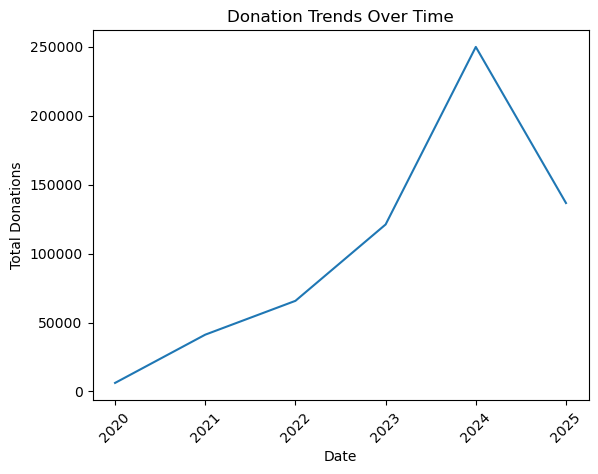

In [45]:
plt.plot(donations_grouped['donation_date'].astype(str), donations_grouped['amount'])
plt.xlabel('Date')
plt.ylabel('Total Donations')
plt.title('Donation Trends Over Time')
plt.xticks(rotation=45)
plt.savefig('donation_trends.png', bbox_inches='tight')
plt.show()

In [47]:
donors['join_date'] = pd.to_datetime(donors['join_date'])
donors.dtypes

donor_id              int64
name                 object
email                object
join_date    datetime64[ns]
dtype: object

In [50]:
signups_by_year = donors['join_date'].dt.year.value_counts().sort_index()
print(signups_by_year)

join_date
2020    39
2021    56
2022    57
2023    74
2024    59
2025    15
Name: count, dtype: int64


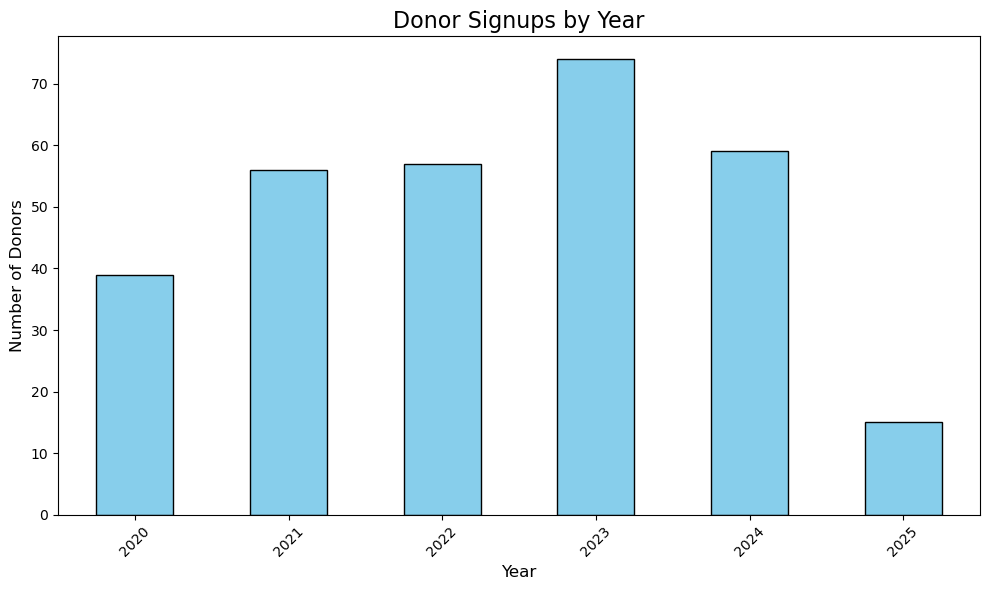

In [56]:
plt.figure(figsize=(10,6))
signups_by_year.plot(kind='bar', color ='skyblue', edgecolor='black')

plt.title('Donor Signups by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Donors', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../donor_signups_by_year.png')
plt.show()